In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from konlpy.tag import Okt
from collections import defaultdict
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, RegexpStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from tqdm import tqdm

from collections import Counter
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE

In [2]:
with open('eng_review.pk', 'rb') as f:
    eng_review = pickle.load(f)

In [40]:
def regular_expression(review):
    
    num = 0
    while num < len(review):
        description = review[num]
        review[num] = re.sub('[^a-z]+',' ',description)
        num += 1
        
    return review

def tokenizing(review):
    
    tokenized = []
    for sen in review:
        tokenized.append(word_tokenize(sen))
        
    return tokenized

def normalize_data(tokenized, normalization):
    
    # input string lower
    normalization = normalization.lower()
    
    # porterstemmer
    if 'porter' in normalization:
        
        porter_list = []
        porter = PorterStemmer()

        for sen in tokenized:
            second_list = []
            for i in sen:
                second_list.append(porter.stem(i))
            porter_list.append(second_list)
            
        return porter_list
    
    # lemmatizer
    if 'lemma' in normalization:
        
        lemmatizer_list = []
        lemmatizer = WordNetLemmatizer()

        for sen in tokenized:
            second_list = []
            for i in sen:
                second_list.append(lemmatizer.lemmatize(i))
            lemmatizer_list.append(second_list)

        return lemmatizer_list
    
def one(review):
    result = []
    rev_list = []
    for rev in review:
        rev_list += [i for i in rev if len(i) > 2]
    result.append(rev_list)
    return result

def stop_words(data):
    
    stop_word = game_stop_word
    result = []
    for i in range(len(data)):
        temp = []
        for word in data[i]:
                if word not in stop_word:
                    temp.append(word)
        result.append(temp)
        
    return result
    
def preprocessing_sen(data, normalization):
    
    review = regular_expression(data)
    
    tokenized = tokenizing(review)
    
    normalized = normalize_data(tokenized, normalization)
    
    review = one(normalized)
    
    result = stop_words(review)
    
    return result

In [39]:
game_stop_word = ['play', 'game', 'played', 'steam', 'playing', 'the', 'and', 'to', 'it', 'is', 'of', 'in', 'this', 'you',
 'but', 'for', 'that', 'with', 'on', 'so', 'they', 'are', 'at', 'me', 'from', 'just', 'if', 'by', 'even', 'still',
 'your', 'be', 'my', 'or', 'more', 'there', 'no', 'not', 'their', 'good', 'like', 'can', 'than', 'after', 'do', 'because',
 'ha', 'wa', 'really', 'one', 'when', 'will','an','about', 'out', 'who', 'don', 'have', 'them', 'what', 'into', 'fun',
 'get', 'up', 'we', 'other', 'been', 'some', 'only', 'now', 'would', 'want', 'every', 'all', 'many', 'over', 'then',
 'had', 'make', 'any', 'most', 'how', 'much', 'very', 'lot', 'which', 'also', 'too', 'well', 'better', 'new', 'go',
 'thing', 'where', 'hasn', 'he', "shan't", "haven't", "hadn't", 'am', 'further', 'ours', 'won', 'until', 'same', "doesn't",
 "you've", 'his', 'during', "weren't", "wasn't", "that'll", 'o', 'our', 'through', 'its', "hasn't", 'was', 'aren', "it's",
 'were', 'again', 'few', 'itself', 'doesn', 'both', 'needn', 'being', 'under', 'll', "she's", "shouldn't", 'doing',
 'ma', "aren't", 'against', 're', 'mustn', "don't", 'haven', 'isn', 'having', 'below', 'ourselves', 'myself', 'off',
 'weren', 'wasn', 'why', 'i', 'does', 'whom', 'those', 'has', 'themselves', 'hers', 'such', 's', "you're", 'ain',
 "couldn't", 'shouldn', 'own', 'couldn', 'm', 'her', 'each', 'wouldn', 'him', 'herself', 'yourselves', 'mightn',
 'down', 'here', 'didn', 'these', 'above', 'once', "wouldn't", 'hadn', 't', 'while', "won't", 'a', 'before', "didn't",
 "needn't", "should've", "mustn't", 'as', 'theirs', 've', 'did', "you'd", "mightn't", "you'll", 'nor', 'himself',
 'between', 'y', 'yours', 'd', "isn't", 'shan', 'she', 'yourself', 'should', 'gameplay', 'ingame','could', 'ever',
                 'since', 'without']


In [4]:
def regular_expression(review):
    
    num = 0
    while num < len(review):
        description = review[num]
        #description = re.sub('[^a-z]+',' ',description)
        #review[num] = re.sub('[-]{2,}',' ',description)
        review[num] = re.sub('[^a-z]+',' ',description)
        num += 1
        
    return review

def tokenizing(review):
    
    tokenized = []
    for sen in review:
        tokenized.append(word_tokenize(sen))
        
    return tokenized

def normalize_data(tokenized, normalization):
    
    # input string lower
    normalization = normalization.lower()
    
    # porterstemmer
    if 'porter' in normalization:
        
        porter_list = []
        porter = PorterStemmer()

        for sen in tokenized:
            second_list = []
            for i in sen:
                second_list.append(porter.stem(i))
            porter_list.append(second_list)
            
        return porter_list
    
    # lemmatizer
    if 'lemma' in normalization:
        
        lemmatizer_list = []
        lemmatizer = WordNetLemmatizer()

        for sen in tokenized:
            second_list = []
            for i in sen:
                second_list.append(lemmatizer.lemmatize(i))
            lemmatizer_list.append(second_list)

        return lemmatizer_list
    
def stop_words(data):
    
    stop_word = game_stop_word
    result = []
    for i in range(len(data)):
        temp = []
        for word in data[i]:
                if word not in stop_word:
                    temp.append(word)
        result.append(temp)
        
    return result

def extract_nouns(tokens):
    result = []
    for token in tokens:
        tagged = nltk.pos_tag(token)
        allnoun = [word for word, pos in tagged if pos in ['NN','NNP']]
        result += [allnoun]
    return result
    
def preprocessing(data, normalization):
    
    review = regular_expression(data)
    
    tokenized = tokenizing(review)
    
    normalized = normalize_data(tokenized, normalization)
    
    result = stop_words(normalized)

    result = extract_nouns(result)
    
    return result

In [6]:
def pos_neg_split(game):
    pos_review = []
    neg_review = []
    game = game.reset_index(drop =True)
    for i in range(len(game)):
        if game['label'][i] == 0:
            neg_review += [game['review'][i]]
        elif game['label'][i] == 1:
            pos_review += [game['review'][i]]
    return pos_review, neg_review

In [7]:
game = (eng_review.loc[eng_review['game'] == 'Eternal Return'])

In [8]:
pos, neg = pos_neg_split(game)

In [9]:
sum_sen = pos + neg

In [11]:
eng_review = preprocessing_sen(sum_sen, 'lemma')

In [24]:
eng_review

[['gon', 'dont', 'week'],
 ['drop', 'loot', 'minute', 'insane', 'loot', 'die', 'th', 'lvl', 'player'],
 ['pubg',
  'start',
  'die',
  'approx',
  'player',
  'loot',
  'gear',
  'point',
  'die',
  'approx',
  'player',
  'rd',
  'th',
  'circle',
  'start',
  'taste',
  'fruit',
  'victory',
  'player',
  'mistake',
  'player',
  'win',
  'ala',
  'end',
  'moment',
  'haunt',
  'feel',
  'rage',
  'anger',
  'serenity',
  'die',
  'welcome',
  'battleground'],
 ['january'],
 ['morning', 'match', 'hour', 'sun', 'recommend'],
 ['map', 'practice', 'aim'],
 ['hey',
  'developer',
  'guy',
  'software',
  'question',
  'guy',
  'example',
  'wg',
  'id',
  'hack',
  'understand',
  'guy',
  'reach',
  'player',
  'market'],
 ['introduction',
  'playerunknown',
  'battleground',
  'battle',
  'royale',
  'player',
  'world',
  'mmofps',
  'tps',
  'x',
  'km',
  'land',
  'support',
  'duo',
  'squad',
  'straightforward',
  'hop',
  'plane',
  'loot',
  'weapon',
  'armor',
  'equipment'

In [12]:
(len(eng_review) *99) * 0.00015

14.597549999999998

In [50]:
with open('eng_review.pk', 'rb') as f:
    eng_review = pickle.load(f)
game = (eng_review.loc[eng_review['game'] == 'Apex Legends™'])
pos, neg = pos_neg_split(game)
sum_sen = pos + neg
eng_review = preprocessing_sen(sum_sen, 'lemma')

In [51]:
model = Word2Vec(sentences=eng_review,  window=5, min_count=15, workers=4)

In [52]:
model.wv.save_word2vec_format('model_word') # model 저장
!python -m gensim.scripts.word2vec2tensor --input model_word --output model_word

2022-10-24 15:36:50,183 - word2vec2tensor - INFO - running C:\Users\LSH\anaconda3\lib\site-packages\gensim\scripts\word2vec2tensor.py --input model_word --output model_word
2022-10-24 15:36:50,183 - keyedvectors - INFO - loading projection weights from model_word
2022-10-24 15:36:50,218 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (260, 100) matrix of type float32 from model_word', 'binary': False, 'encoding': 'utf8', 'datetime': '2022-10-24T15:36:50.206049', 'gensim': '4.2.0', 'python': '3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'load_word2vec_format'}
2022-10-24 15:36:50,230 - word2vec2tensor - INFO - 2D tensor file saved to model_word_tensor.tsv
2022-10-24 15:36:50,230 - word2vec2tensor - INFO - Tensor metadata file saved to model_word_metadata.tsv
2022-10-24 15:36:50,230 - word2vec2tensor - INFO - finished running word2vec2tensor.py


In [ ]:
# problem, matter 부정 고정단어
# 

In [23]:
model.wv.most_similar("hacker", topn=50)

[('developer', 0.999506950378418),
 ('pubg', 0.9994446039199829),
 ('change', 0.9994335770606995),
 ('day', 0.9993958473205566),
 ('reason', 0.9993926286697388),
 ('money', 0.9993787407875061),
 ('nothing', 0.999345064163208),
 ('try', 0.9993365406990051),
 ('edit', 0.9993313550949097),
 ('bullet', 0.9993308782577515),
 ('issue', 0.9993301033973694),
 ('name', 0.999321460723877),
 ('move', 0.9993158578872681),
 ('player', 0.9993151426315308),
 ('care', 0.9993114471435547),
 ('access', 0.9993082284927368),
 ('devs', 0.9993064999580383),
 ('year', 0.9993059039115906),
 ('idea', 0.9992979764938354),
 ('everyone', 0.9992946982383728),
 ('skin', 0.9992935657501221),
 ('company', 0.9992912411689758),
 ('end', 0.9992771148681641),
 ('time', 0.9992741346359253),
 ('review', 0.9992710947990417),
 ('hour', 0.9992678165435791),
 ('way', 0.9992673993110657),
 ('use', 0.9992669820785522),
 ('matter', 0.9992664456367493),
 ('pas', 0.9992433190345764),
 ('action', 0.9992414116859436),
 ('gun', 0.9992

In [33]:
model.wv.most_similar("hacker", topn=50)

[('developer', 0.9995250701904297),
 ('day', 0.9994992017745972),
 ('pubg', 0.999455988407135),
 ('reason', 0.9994494915008545),
 ('change', 0.999431848526001),
 ('move', 0.9994103908538818),
 ('bullet', 0.9994001388549805),
 ('year', 0.999388575553894),
 ('edit', 0.9993752837181091),
 ('money', 0.9993607401847839),
 ('nothing', 0.9993568062782288),
 ('care', 0.9993510246276855),
 ('idea', 0.99934321641922),
 ('issue', 0.9993383288383484),
 ('devs', 0.99933260679245),
 ('hour', 0.9993230104446411),
 ('company', 0.9993192553520203),
 ('end', 0.9993164539337158),
 ('try', 0.9993155598640442),
 ('name', 0.9993131160736084),
 ('matter', 0.999287486076355),
 ('player', 0.9992828965187073),
 ('everyone', 0.9992818236351013),
 ('time', 0.9992726445198059),
 ('start', 0.9992726445198059),
 ('person', 0.9992699027061462),
 ('gun', 0.9992696642875671),
 ('pas', 0.9992665648460388),
 ('way', 0.9992641806602478),
 ('skin', 0.999261736869812),
 ('patch', 0.999260425567627),
 ('buy', 0.9992544054985

In [17]:
vocab = list(model.wv.key_to_index)
X = model.wv[vocab]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

C:\Users\LSH\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\LSH\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [18]:
sim_keyword = lambda x : [i[0] for i in model.wv.most_similar(x)]

In [ ]:

new_df = df.loc[sim_keyword('guild')]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(new_df['x'], new_df['y'], color='r')

for word, pos in new_df.iterrows():
    ax.annotate(word, pos)
    
new_df = df.loc[sim_keyword('player')]
ax.scatter(new_df['x'], new_df['y'], color='b')

for word, pos in new_df.iterrows():
    ax.annotate(word, pos)

In [19]:
def get_scatter(*keywords):
    colors = ['r','b','g']
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for i, keyword in enumerate(keywords):
        new_df = df.loc[sim_keyword(keyword)]
        ax.scatter(new_df['x'], new_df['y'], color=colors[i])
        for word, pos in new_df.iterrows():
            ax.annotate(word, pos)

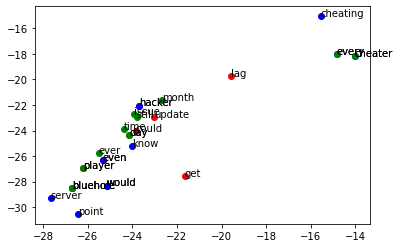

In [20]:
get_scatter(*['cheater','player','hacker'])